In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [21]:
df = pd.read_csv(r'D:\Program Files (x86)\Binus\Semsester 5\Portofolio - Movie Correlation\Dataset\movies.csv')

In [23]:
df=df.dropna()

In [24]:
for col in df.columns:
    pct_miss = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_miss*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [30]:
print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
CorrectYear     object
dtype: object


In [25]:
df['budget'] = df['budget'].astype('int64')


In [26]:
df['gross'] = df['gross'].astype('int64')

In [27]:
df['CorrectYear'] = df['year'].astype(str)

In [28]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [29]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2009
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1993
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2000
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [56]:
#Visualize Data to find the Correlation

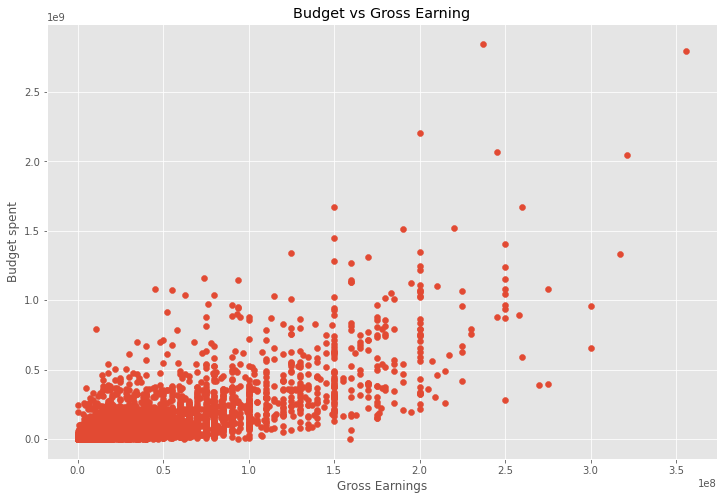

In [12]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget spent')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

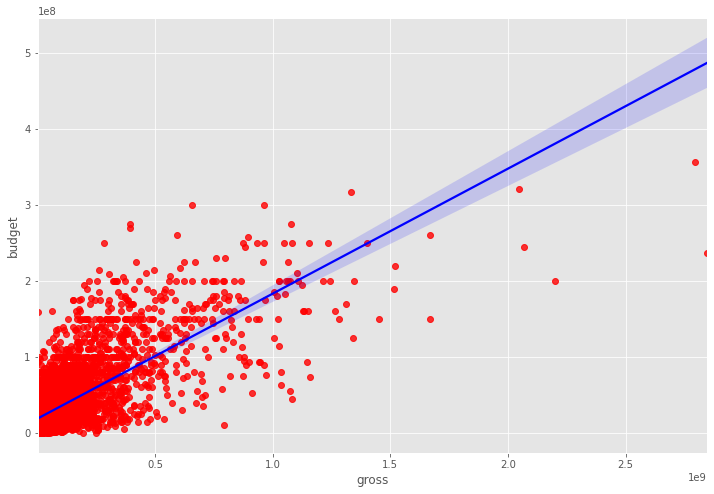

In [13]:
sns.regplot(x="gross", y="budget", data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [14]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


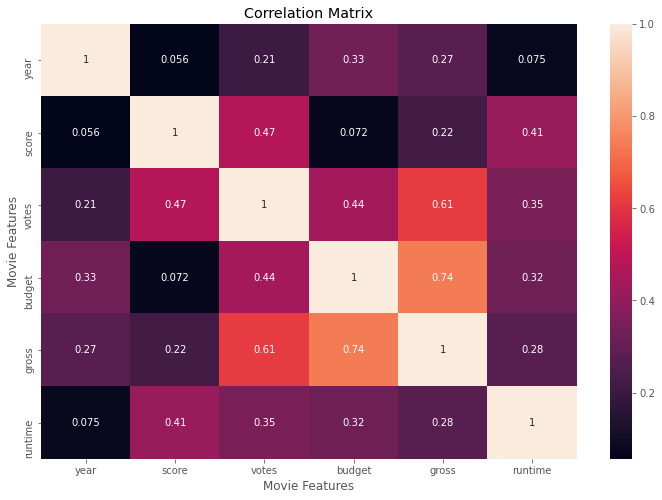

In [15]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes        

In [17]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,29
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,13
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,20
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


In [31]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2009
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1993
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2000
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


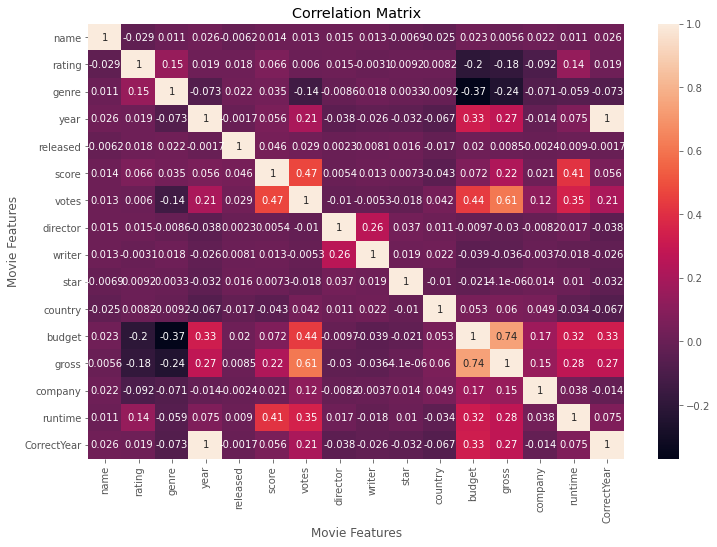

In [32]:
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
sorted_corr = corr_pairs.sort_values()
sorted_corr

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
                              ...   
gross        gross          1.000000
director     director       1.000000
CorrectYear  CorrectYear    1.000000
             year           1.000000
year         CorrectYear    1.000000
Length: 256, dtype: float64

In [39]:
high_corr = sorted_corr[(sorted_corr > 0.5)]

In [40]:
high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
runtime      runtime        1.000000
votes        votes          1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
director     director       1.000000
CorrectYear  CorrectYear    1.000000
             year           1.000000
year         CorrectYear    1.000000
dtype: float64